<Axes: >

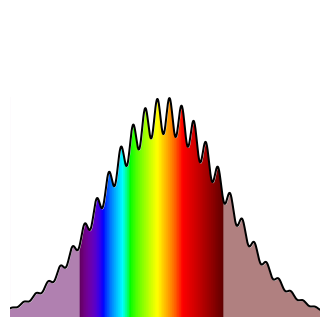

In [6]:
import numpy as np
from hipster import SpectrumPlotter

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths * 0.1) ** 2) * np.exp(-0.00002 * (wavelengths - 600) ** 2)
spectrum_plotter = SpectrumPlotter(wavelengths, figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

<Axes: >

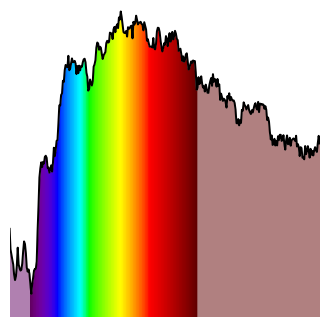

In [7]:
from hipster import Reconstruction

rg = Reconstruction("tests/models/vae_decoder.onnx")
point = np.array([[0, 0.5, 0.5]], dtype=np.float32)
spectrum = rg(point)[0][0]
wavelengths = np.arange(336, 1023, 2)
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

In [8]:
canvas = plt.figure.canvas
canvas.draw()

image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
image = image_flat.reshape(*reversed(canvas.get_width_height()), 3)
np.min(image), np.max(image), image.shape

/tmp/ipykernel_1307929/1427364658.py:4: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')


(0, 255, (400, 400, 3))